In [4]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from statsmodels.tools.eval_measures import rmse

In [5]:
# location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\Advertising.csv"

In [6]:
# load the training data from glass data set
# df_training = pd.read_csv(location)

In [7]:
df_training = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df_training.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
# check the shape of the DataFrame (rows, columns)
df_training.shape

(200, 4)

In [9]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = df_training[feature_cols]

# select a Series from the DataFrame
y = df_training['sales']

In [10]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [11]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


### using statsmodel 

In [12]:
# create a fitted model with all three features
sm_model = smf.ols(formula='sales ~ TV + radio + newspaper', 
                   data=df_training).fit()

In [85]:
# print the coefficients
sm_model.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

### using scikit learn

In [13]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [15]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04576464545539759),
 ('radio', 0.18853001691820465),
 ('newspaper', -0.001037493042476273)]

In [16]:
# Making predictions
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [90]:
### STATSMODELS ###

# print a summary of the fitted model
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           1.58e-96
Time:                        20:01:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Hypothesis Testing and p-values

__null hypothesis:__
$H_0 $ : There is no relationship between TV ads and Sales

__alternative hypothesis__:
$H_A $ : There is a relationship between TV ads and Sales

__Testing hypothesis__

(A) Reject the null hypothesis,
- if p-value less then alpha , $\alpha$ = 0.05
- There is a relationship. Strong $\beta$ coeff
- If the 95% confidence interval does not include zero

(B) Fail to reject the null hypothesis,
- if if p-value more then alpha , $\alpha$ = 0.05
- There is no relationship, weak $\beta$ coeff
- If the 95% confidence interval includes zero

In [91]:
# print the p-values for the model coefficients
sm_model.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [17]:
feature_cols_added_intercept = []
feature_cols_added_intercept = feature_cols.copy()
feature_cols_added_intercept.insert(0, 'Intercept')
feature_cols_added_intercept

['Intercept', 'TV', 'radio', 'newspaper']

In [95]:
list(zip(feature_cols_added_intercept, sm_model.pvalues))

[('Intercept', 1.2672945051317226e-17),
 ('TV', 1.5099599548140058e-81),
 ('radio', 1.5053389205756583e-54),
 ('newspaper', 0.859915050080569)]

In [18]:
for each in list(zip(feature_cols_added_intercept, sm_model.pvalues)):
    if each[1] <=0.05:
        print('REJECT the NULL hypothesis: the col {} has strong relationship with reponse variable. Include the column'.format({each[0]}))
    else:
        print('ACCEPT the NULL hypothesis: the col {} has NO relationship with reponse variable. Exclude the column'.format({each[0]}))                                                                                                                        

REJECT the NULL hypothesis: the col {'Intercept'} has strong relationship with reponse variable. Include the column
REJECT the NULL hypothesis: the col {'TV'} has strong relationship with reponse variable. Include the column
REJECT the NULL hypothesis: the col {'radio'} has strong relationship with reponse variable. Include the column
ACCEPT the NULL hypothesis: the col {'newspaper'} has NO relationship with reponse variable. Exclude the column


# How Well Does the Model Fit the data?

- __R-squared__ is the proportion of variance explained
- It is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model
- The null model just predicts the mean of the observed response, and thus it has an intercept and no slope
- R-squared is between 0 and 1
- Higher values are better because it means that more variance is explained by the model.

In [19]:
### STATSMODELS

# print the R-squared value for the model
sm_model.rsquared

0.8972106381789522

In [20]:
# Model evaluation metrics for regression

print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  1.0009163574043045
Mean Sq  Error MSE      :  1.7173862805677316
Root Mean Sq Error RMSE :  1.3104908548203347
r2 value                :  0.9309640558299838


#### Issure with R-squared


In [99]:
# statsmodel with only TV and Radio
sm_model = smf.ols(formula='sales ~ TV + radio', data=df_training).fit()

# print the R-squared value for the model
print(sm_model.rsquared, sm_model.rsquared_adj)

# statsmodel with only TV and Radio and newspaper
sm_model = smf.ols(formula='sales ~ TV + radio + newspaper', 
              data=df_training).fit()

# print the R-squared value for the model
print(sm_model.rsquared, sm_model.rsquared_adj)

0.8971942610828956 0.8961505479974428
0.8972106381789522 0.8956373316204668


- R-squared will always increase as you add more features to the model, even if they are unrelated to the response
- Selecting the model with the highest __R-squared is not a reliable approach__ for choosing the best linear model.

__Solution__

Adjusted R-squared - Penalizes model complexity 

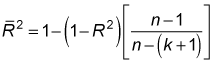

In [21]:
df_training.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [22]:
# add 10 columns, incrementally and check R2 at each step
r2_scores       = []
adj_r2_scores   = []

num_cols_to_add = 20

for iter in range(num_cols_to_add):
    
    new_col_name = 'X'+str(iter)
    df_training[new_col_name] = np.random.normal(1, 1, len(df_training))
    
    # use the list to select a subset of the original DataFrame
    X = df_training.drop(['sales'], axis = 1)

    # select a Series from the DataFrame
    y = df_training['sales']

    # Splitting X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

    # instantiate
    linreg = LinearRegression()

    # fit the model to the training data (learn the coefficients)
    linreg.fit(X, y)

    # make predictions on the testing set
    y_pred = linreg.predict(X_test)

    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    # calculate the adjusted R2
    num_cols = X.shape[1]
    
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)- num_cols - 1)
    
    adj_r2_scores.append(adj_r2)

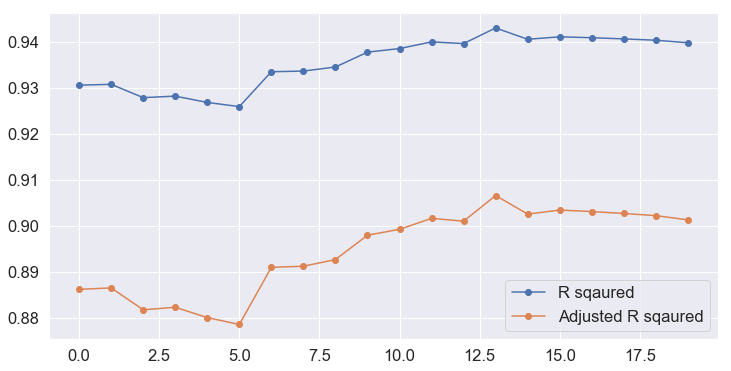

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(r2_scores,      marker='o', label='R sqaured')
plt.plot(adj_r2_scores,  marker='o', label='Adjusted R sqaured');

#plt.ylim(.5, 1)
plt.legend(loc="lower right");